Lorenz方程式を4次のルンゲクッタで解く

In [95]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## ローレンツ方程式を解く

\begin{equation*} dxdt = 10*(y-x)             --- (1)  \end{equation*}
\begin{equation*} dydt = 28*x - y - x*z       --- (2)  \end{equation*}
\begin{equation*} dzdt = -(8./3.)*z + x*y     --- (3)  \end{equation*}


ここでは[4次のルンゲクッタ法](http://www.geocities.jp/supermisosan/rksimultaneousequation.html)を用いて数値解を求める。




In [96]:
from Lorenz import Lorenz # 自作モジュール

Initial condition X0:0.29,Y0:0.52,Z0:0.63
Finish Created  lorenz-100.csv


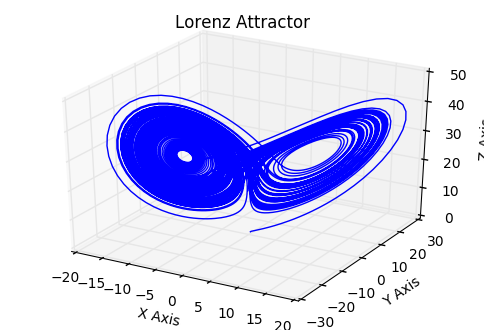

In [97]:
# Settings
filename = "lorenz-100.csv" # 出力名
dt = 0.01 # 時間幅
max_count = 10000 # 反復回数
x0 = np.random.rand() # xの初期値
y0 = np.random.rand() # yの初期値
z0 = np.random.rand() # zの初期値
t0 = 100000 # tの初期値

print("Initial condition X0:{:.02f},Y0:{:.02f},Z0:{:.02f}".format(x0,y0,z0))

# Analys
Lorenz.createLorenz(filename, dt, max_count, t0=0, x0=x0, y0=0, z0=0)
print("Finish Created ", filename)
# POST
Lorenz.post(filename, do_plot=True)

In [98]:
import pandas as pd
import math

In [99]:
# Lorenzデータを呼び出し
filename = "lorenz-100.csv"
lorenz = Lorenz.readCsv(filename)
#t = lorenz[:,0]
x = lorenz[1000:,1]
#y = lorenz[:,2]
#z = lorenz[:,3]


In [100]:
# サイクルあたりのステップ数
steps_per_cycle = 50
# 生成するサイクル数
number_of_cycles = 100

In [101]:
df = pd.DataFrame(t[0:steps_per_cycle * number_of_cycles + 1], columns=["t"])
df.head()

,t
0,0.00
1,0.01
2,0.02
3,0.03
4,0.04


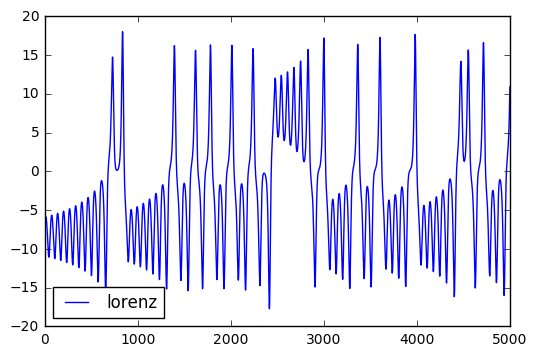

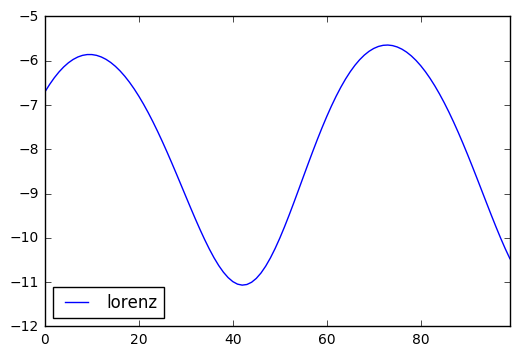

In [102]:
df["lorenz"] = x[0:steps_per_cycle * number_of_cycles + 1]
df[["lorenz"]].plot()
df[["lorenz"]].head(steps_per_cycle * 2).plot()

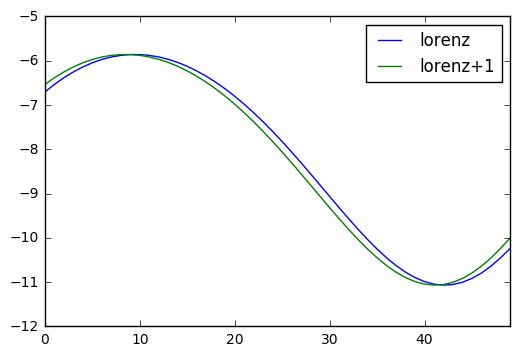

In [103]:
df["lorenz+1"] = df["lorenz"].shift(-1)
df.tail()
df.dropna(inplace=True)
df.tail()
df[["lorenz", "lorenz+1"]].head(steps_per_cycle).plot()
matrix = df[["lorenz", "lorenz+1"]].as_matrix()

np.save("normal.npy", matrix)